# 逻辑回归案例联系：多分类

## 1引用包

In [1]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt

Automatically created module for IPython interactive environment


In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

## 2 准备数据

In [136]:
# 基于3个中心点生成数据
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
X[:5]

array([[-5.09227256,  0.87072588],
       [-4.76257213, -0.39181357],
       [-6.3026177 , -0.16682567],
       [ 3.90197303, -0.78399462],
       [ 0.970112  ,  2.18421299]])

In [137]:
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)
X[:5]

array([[-2.38519938,  0.02641654],
       [-1.74830343, -1.4226907 ],
       [-2.45431681, -1.46071435],
       [ 1.87438706, -0.16039893],
       [-0.48564039,  2.81507798]])

### 2.1 原始数据分布

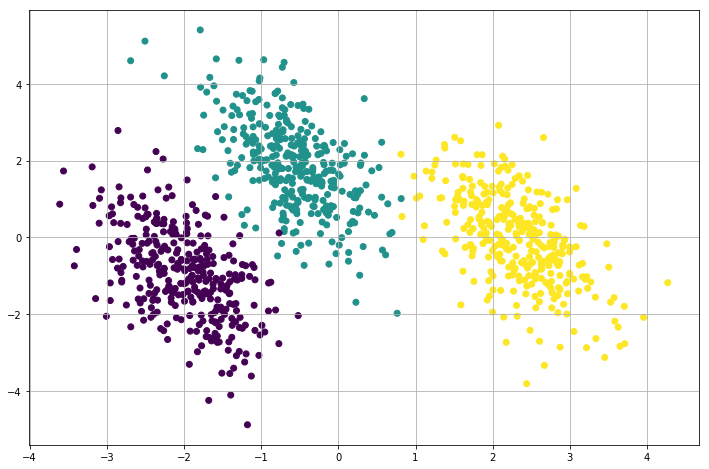

In [138]:
plt.figure(figsize=[12,8])
plt.scatter(x=X[:,0],y=X[:,1],c=y)
plt.grid()
plt.show()

## 3 训练

In [139]:
clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,multi_class="multinomial").fit(X, y)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

## 4 训练简单评分

In [140]:
print("训练评估：score : %.3f (%s)" % (clf.score(X, y), "multinomial"))

训练评估：score : 0.995 (multinomial)


In [141]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
(x_min,x_max),(y_min,y_max)

((-4.6112417579817482, 5.2690910070542527),
 (-5.8834101518569604, 6.4064727147167728))

In [142]:
width01=np.arange(x_min, x_max, h)
width01.shape 

(495,)

In [143]:
height01=np.arange(y_min, y_max, h)
height01.shape

(615,)

In [144]:
xx, yy = np.meshgrid(width01,height01)

In [145]:
xx.shape,yy.shape

((615, 495), (615, 495))

## 5 预测

In [146]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z[:5]

array([0, 0, 0, 0, 0])

In [147]:
Z = Z.reshape(xx.shape)
Z[:5]

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

## 6.逻辑回归系数

In [148]:
coef = clf.coef_
intercept = clf.intercept_
coef

array([[-4.51827313, -1.56106962],
       [-0.08860005,  0.72634754],
       [ 4.60687318,  0.83472208]])

In [149]:
intercept

array([-1.69953772,  2.89754216, -1.19800443])

## 7 画图

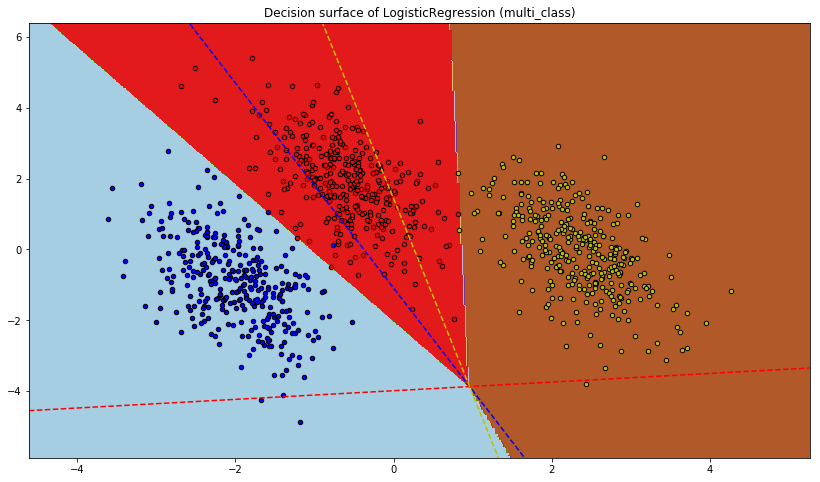

In [168]:
plt.figure(figsize=(14,8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of LogisticRegression (%s)" % "multi_class")
plt.axis('tight')

# Plot also the training points
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,cmap=plt.cm.Paired,edgecolor='black', s=20)

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

for i, color in zip(clf.classes_, colors):
     plot_hyperplane(i, color)

plt.show()

In [103]:
plt.cm.Paired.colors

((0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392))

In [105]:
zip(clf.classes_, colors)

[(0, 'b'), (1, 'r'), (2, 'y')]